Please, set the length N of the NxN spin array:7
Please, set the temperature T:6
Type k for Kawasaki or g for Glauber dynamics:k


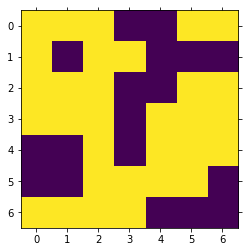

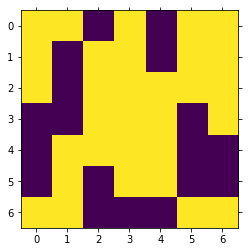

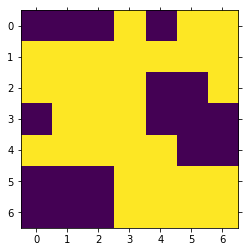

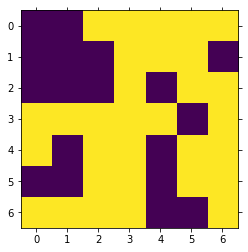

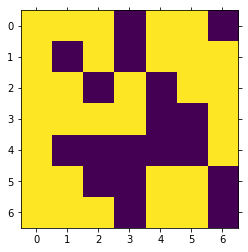

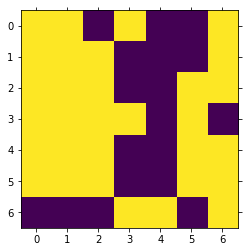

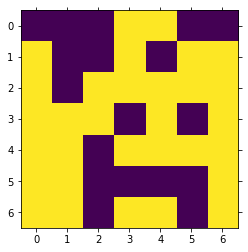

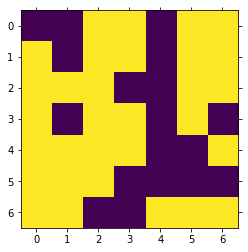

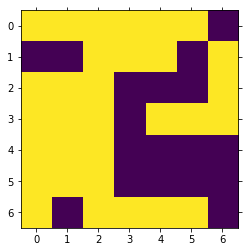

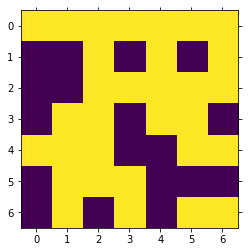

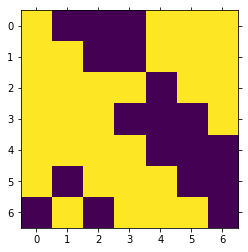

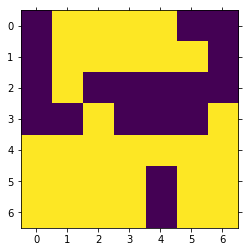

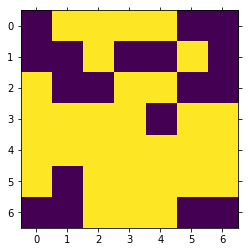

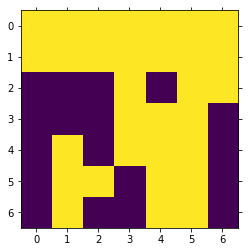

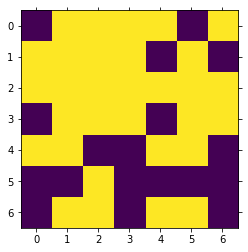

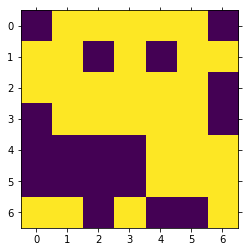

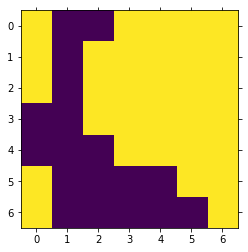

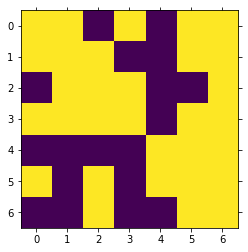

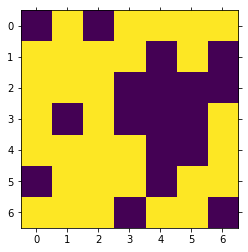

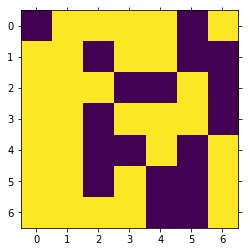

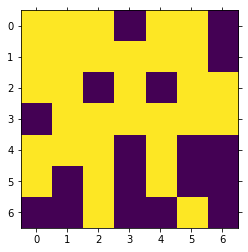

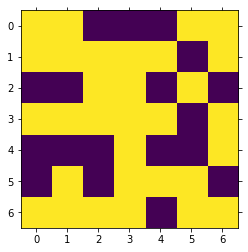

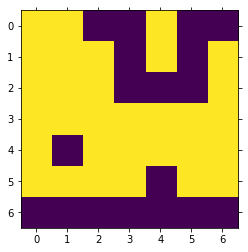

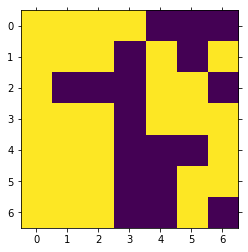

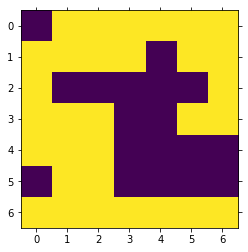

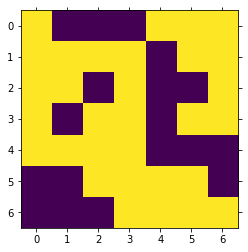

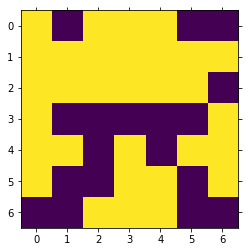

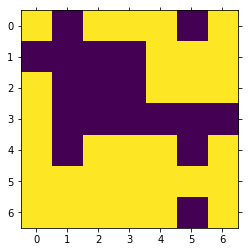

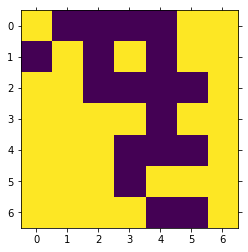

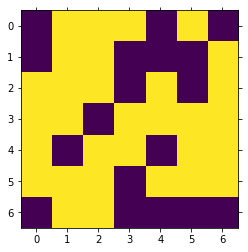

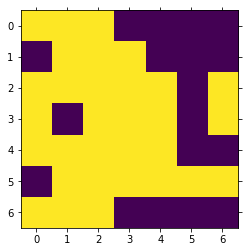

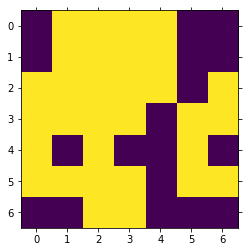

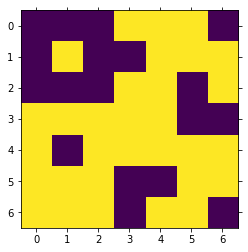

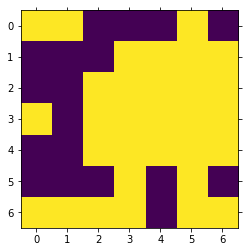

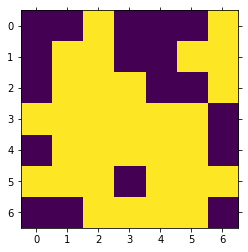

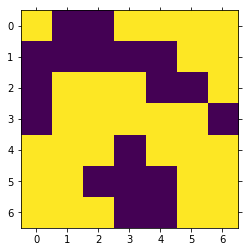

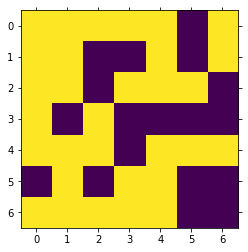

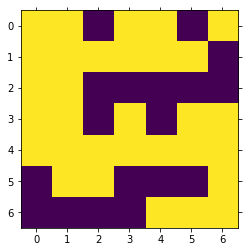

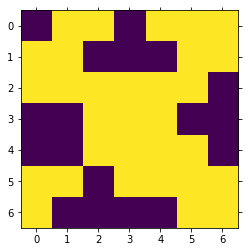

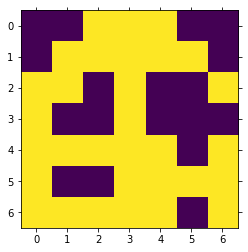

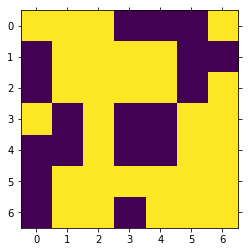

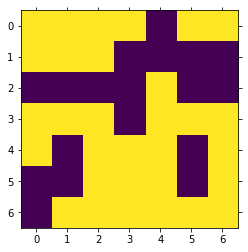

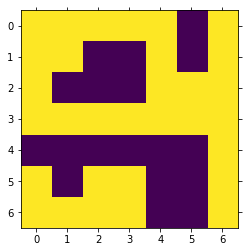

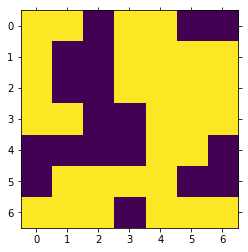

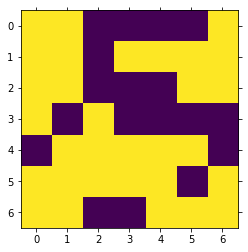

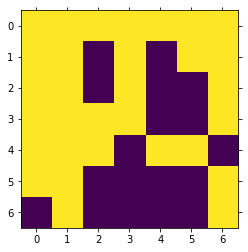

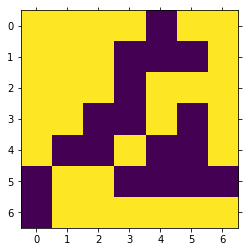

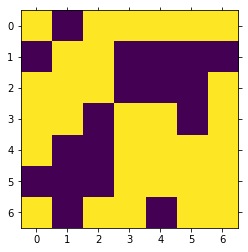

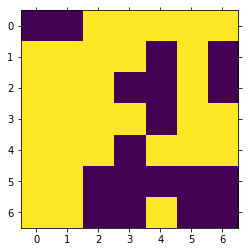

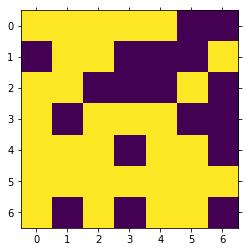

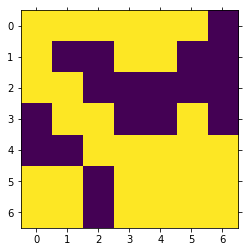

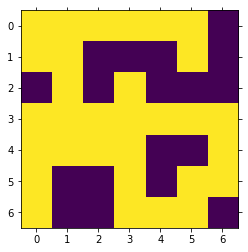

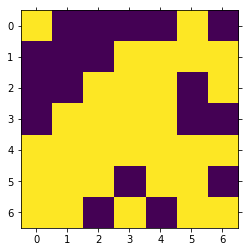

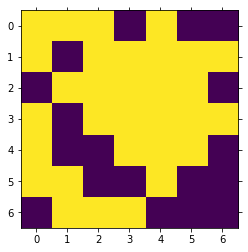

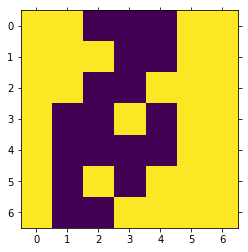

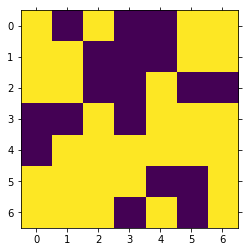

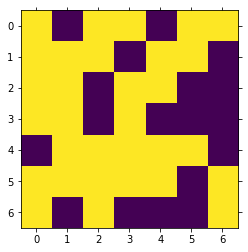

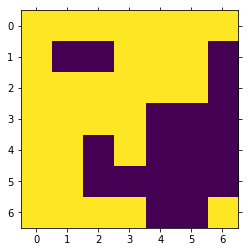

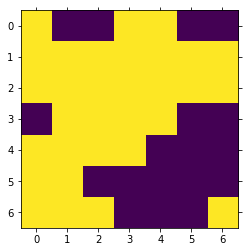

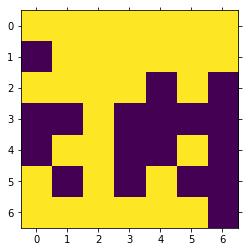

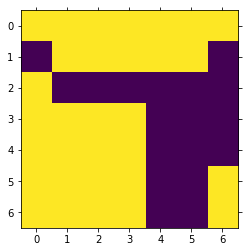

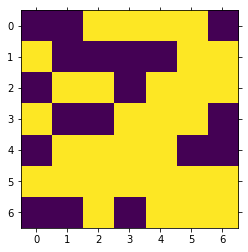

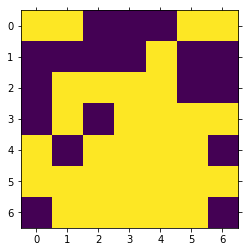

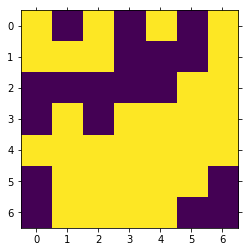

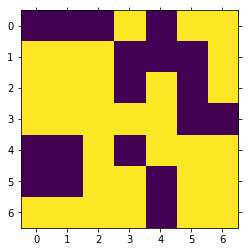

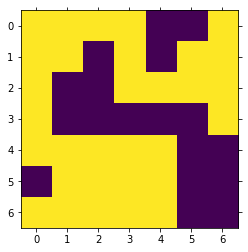

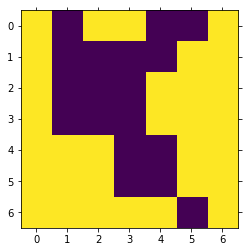

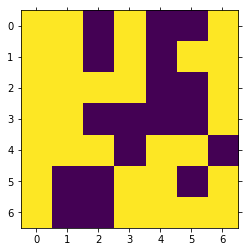

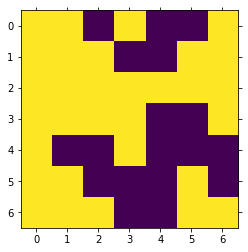

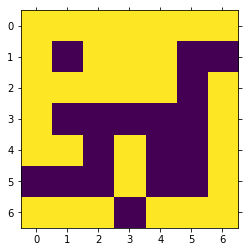

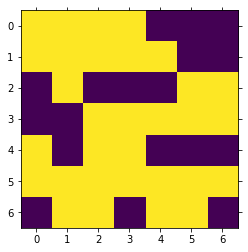

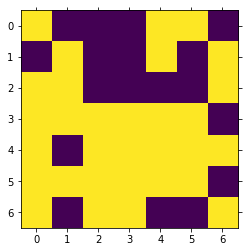

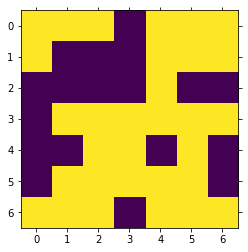

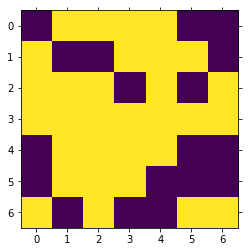

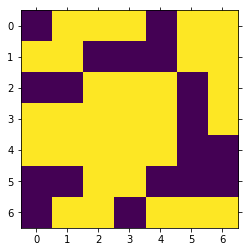

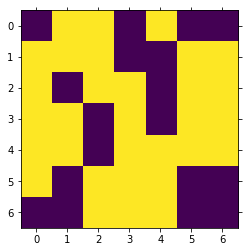

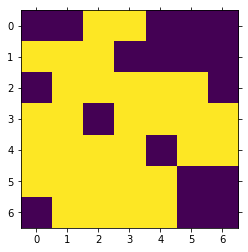

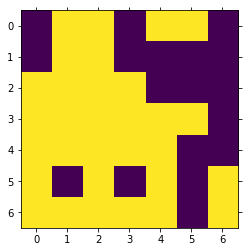

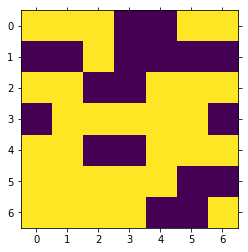

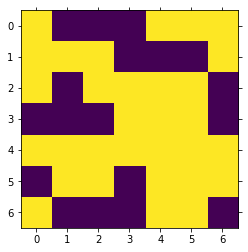

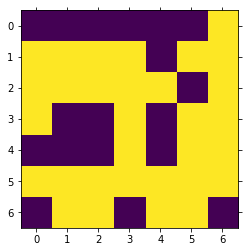

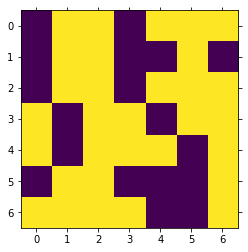

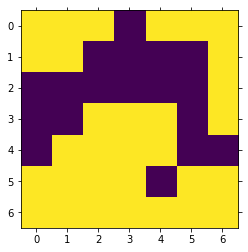

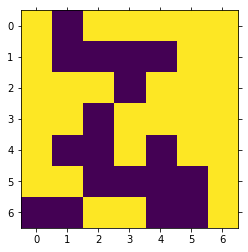

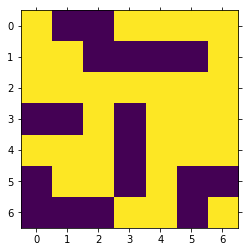

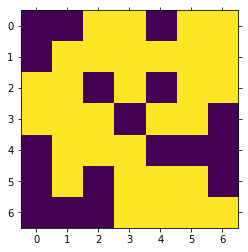

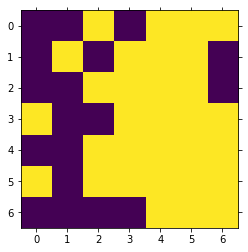

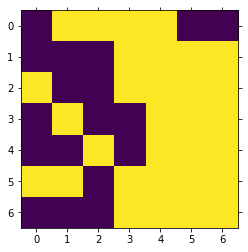

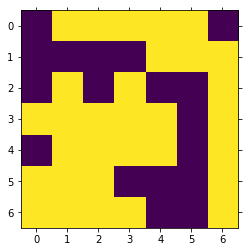

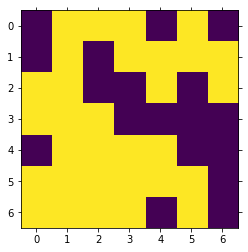

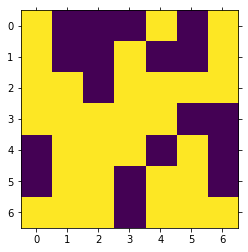

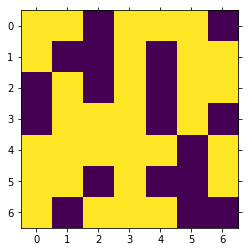

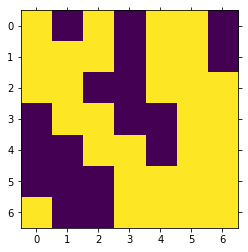

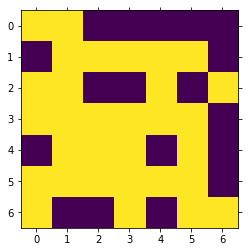

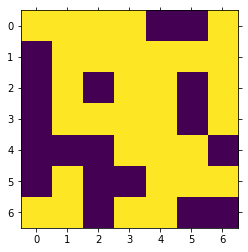

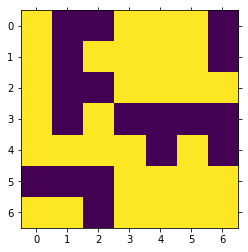

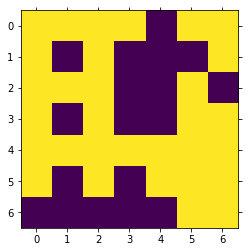

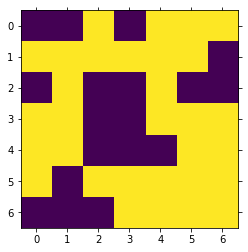

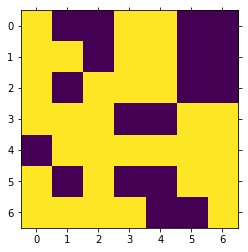

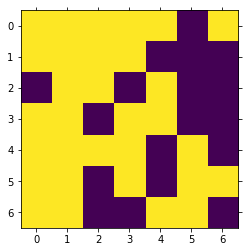

It took: 0.4992456873257955 minutes to run


In [1]:
import matplotlib
import sys
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import time

start_time=time.time()


#Number of Montecarlo sweeps for calculation
Steps = 100       
#Snapshots for animation
Snapshots=1

#Ask for spin array length
N=int(input("Please, set the length N of the NxN spin array:"))
#Ask the desired temperature
T=float(input("Please, set the temperature T:"))

n = 1/(N*N)
beta=1.0/T    
Algorithm=input("Type k for Kawasaki or g for Glauber dynamics:" "")

#Generate random initial state
def initialstate(N):   
    
    initspin = 2*np.random.randint(2, size=(N,N))-1
    return initspin

#Calculates energy for a given spin configuration
def calcEnergy(spin):
    
    Totalenergy=0
    for i in range(N):
        for j in range(N):
            if i == (N-1):
                if j == (N-1) :
                    energy=spin[i,j]*(spin[0,j]+spin[i,0]+spin[i-1,j]+spin[i,j-1])

                else:

                    if j == 0:
                        energy=-spin[i,0]*(spin[0,0]+spin[i,1]+spin[i-1,0]+spin[i,N-1])

                    else:
                        energy=-spin[i,j]*(spin[0,j]+spin[i,j+1]+spin[i-1,j]+spin[i,j-1])
            elif i==0:

                if j == (N-1):
                    energy=-spin[0,j]*(spin[0,0]+spin[1,j]+spin[N-1,j]+spin[0,j-1])

                elif j == 0:
                    energy=-spin[0,0]*(spin[0,1]+spin[1,0]+spin[N-1,0]+spin[0,N-1])

                else:
                    energy=-spin[0,j]*(spin[0,j+1]+spin[1,j]+spin[N-1,j]+spin[0,j-1])

            else:

                if j == (N-1) :
                    energy=-spin[i,j]*(spin[i+1,j]+spin[i,0]+spin[i-1,j]+spin[i,j-1])

                elif j == 0:
                    energy=-spin[i,0]*(spin[i+1,0]+spin[i,1]+spin[i-1,0]+spin[i,N-1])

                else:
                    energy=-spin[i,j]*(spin[i+1,j]+spin[i,j+1]+spin[i-1,j]+spin[i,j-1])

            Totalenergy+=energy
    
    return Totalenergy/2

#Monte carlo using Glauber´s algorithm
def moveGlauber(spin,beta):
    
    for a in range(N):
        for b in range(N):
            i = np.random.randint(0, N)
            j = np.random.randint(0, N)
            newspin =  spin[i, j]
    
            if i == (N-1):
                if j == (N-1) :
                    sumspins = spin[0,j]+spin[i,0]+spin[i-1,j]+spin[i,j-1]
        
                else:
            
                    if j == 0:
                        sumspins = spin[0,0]+spin[i,1]+spin[i-1,0]+spin[i,N-1]
        
                    else:
                        sumspins = spin[0,j]+spin[i,j+1]+spin[i-1,j]+spin[i,j-1]
            elif i==0:

                if j == (N-1):
                    sumspins = spin[0,0]+spin[1,j]+spin[N-1,j]+spin[0,j-1]
        
                elif j == 0:
                    sumspins = spin[0,1]+spin[1,0]+spin[N-1,0]+spin[0,N-1]
        
                else:
                    sumspins = spin[0,j+1]+spin[1,j]+spin[N-1,j]+spin[0,j-1]
    
            else:
        
                if j == (N-1) :
                    sumspins = spin[i+1,j]+spin[i,0]+spin[i-1,j]+spin[i,j-1]
        
                elif j == 0:
                    sumspins = spin[i+1,0]+spin[i,1]+spin[i-1,0]+spin[i,N-1]
        
                else:
                    sumspins = spin[i+1,j]+spin[i,j+1]+spin[i-1,j]+spin[i,j-1]
            
            Ecost = 2*newspin*sumspins
            p= min(1, np.exp(-Ecost*beta))
            randomnum=np.random.rand()
            if randomnum < p :
                newspin *= -1
            spin[i,j] = newspin
    
    return spin

#Monte carlo using Kawasaki´s algorithm
def moveKawasaki(spin,beta):
    
    
    for m in range(N):
        for n in range(N):
            
            while True:
            
                i = np.random.randint(0, N)
                j = np.random.randint(0, N)
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)

                spin1 = spin[i,j]
                spin2 = spin[a,b]
            

                if np.sign(spin1) != np.sign(spin2):
                
                    break
                
            if i == (N-1):
                if j == (N-1) :
                    sumspins1 = spin[0,j]+spin[i,0]+spin[i-1,j]+spin[i,j-1]
        
                else:
            
                    if j == 0:
                        sumspins1 = spin[0,0]+spin[i,1]+spin[i-1,0]+spin[i,N-1]
        
                    else:
                        sumspins1 = spin[0,j]+spin[i,j+1]+spin[i-1,j]+spin[i,j-1]
                    
            elif i==0:

                if j == (N-1):
                    sumspins1 = spin[0,0]+spin[1,j]+spin[N-1,j]+spin[0,j-1]
        
                elif j == 0:
                    sumspins1 = spin[0,1]+spin[1,0]+spin[N-1,0]+spin[0,N-1]
        
                else:
                    sumspins1 = spin[0,j+1]+spin[1,j]+spin[N-1,j]+spin[0,j-1]
    
            else:
        
                if j == (N-1) :
                    sumspins1 = spin[i+1,j]+spin[i,0]+spin[i-1,j]+spin[i,j-1]
        
                elif j == 0:
                    sumspins1 = spin[i+1,0]+spin[i,1]+spin[i-1,0]+spin[i,N-1]
        
                else:
                    sumspins1 = spin[i+1,j]+spin[i,j+1]+spin[i-1,j]+spin[i,j-1]
                    
                    
                    
            if a == (N-1):
                        
                if b == (N-1) :
                    sumspins2 = spin[0,b]+spin[a,0]+spin[a-1,b]+spin[a,b-1]
        
                else:
            
                    if b == 0:
                        sumspins2 = spin[0,0]+spin[a,1]+spin[a-1,0]+spin[a,N-1]
        
                    else:
                        sumspins2 = spin[0,b]+spin[a,b+1]+spin[a-1,b]+spin[a,b-1]
                    
            elif a==0:

                if b == (N-1):
                    sumspins2 = spin[0,0]+spin[1,b]+spin[N-1,b]+spin[0,b-1]
        
                elif b == 0:
                    sumspins2 = spin[0,1]+spin[1,0]+spin[N-1,0]+spin[0,N-1]
        
                else:
                    sumspins2 = spin[0,b+1]+spin[1,b]+spin[N-1,b]+spin[0,b-1]
    
            else:
        
                if b == (N-1) :
                    sumspins2 = spin[a+1,b]+spin[a,0]+spin[a-1,b]+spin[a,b-1]
        
                elif b == 0:
                    sumspins2 = spin[a+1,0]+spin[a,1]+spin[a-1,0]+spin[a,N-1]
        
                else:
                    sumspins2 = spin[a+1,b]+spin[a,b+1]+spin[a-1,b]+spin[a,b-1]
            
            Modulus = abs(i-a) + abs(b-j)
            
            if Modulus == 1:
                Ecost=((sumspins1-sumspins2)*(2*spin1))+4
            elif Modulus == (N-1):
                Ecost=((sumspins1-sumspins2)*(2*spin1))+4
            else:
                Ecost=((sumspins1-sumspins2)*(2*spin1)) 
            
            p=min(1, np.exp(-Ecost*beta))
            randomnum=np.random.rand()
                
            if randomnum < p :
                spin1*=-1
                spin2*=-1                
            spin[i,j] = spin1
            spin[a,b] = spin2
    
    
    return spin


spin = initialstate(N)

im=plt.imshow(spin,animated=True)

if Algorithm == "g": 
         
    for i in range(Steps):         
        for j in range(Snapshots):
            moveGlauber(spin, beta)
        plt.cla()
        im=plt.imshow(spin,animated=True)
        plt.draw()
        plt.pause(0.0001)
        
elif Algorithm == "k":
 
    for i in range(Steps):         
        for j in range(Snapshots):
            moveKawasaki(spin, beta)
        plt.cla()
        im=plt.imshow(spin,animated=True)
        plt.draw()
        plt.pause(0.0001)
        
else:
    print("You did not press k nor g, please try again.")

print("It took: "+str((time.time()-start_time)/60)+" minutes to run")